In [20]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [5]:
OD = np.random.randint(100,10000, (1000,1000))
thresh = 200

In [6]:
# initialize the population vector from the origin-destination flow matrix
N_k = np.abs(np.diagonal(OD) + OD.sum(axis=0) - OD.sum(axis=1))
locs_len = len(N_k)                 # number of locations
SIR = np.zeros(shape=(locs_len, 3)) # make a numpy array with 3 columns for keeping track of the S, I, R groups
SIR[:,0] = N_k                      # initialize the S group with the respective populations

In [7]:
first_infections = np.where(SIR[:, 0]<=thresh, SIR[:, 0]//20, 0)   # for demo purposes, randomly introduce infections
SIR[:, 0] = SIR[:, 0] - first_infections
SIR[:, 1] = SIR[:, 1] + first_infections                           # move infections to the I group

In [8]:
# row normalize the SIR matrix for keeping track of group proportions
row_sums = SIR.sum(axis=1)
SIR_n = SIR / row_sums[:, np.newaxis]

In [68]:
# initialize parameters
beta = 0.16
gamma = 0.04
public_trans = 0.5                                 # alpha
R0 = beta/gamma
beta_vec = np.random.gamma(beta, 2, locs_len)
gamma_vec = np.full(locs_len, gamma)
public_trans_vec = np.full(locs_len, public_trans)

In [69]:
# make copy of the SIR matrices 
SIR_sim = SIR.copy()
SIR_nsim = SIR_n.copy()

In [70]:
# run model
print(SIR_sim.sum(axis=0).sum() == N_k.sum())
infected_pop_norm = []
susceptible_pop_norm = []
recovered_pop_norm = []
for time_step in tqdm.tqdm_notebook(range(100)):
  infected_mat = np.array([SIR_nsim[:,1],]*locs_len).transpose()
  OD_infected = np.round(OD*infected_mat)
  inflow_infected = OD_infected.sum(axis=0)
  inflow_infected = np.round(inflow_infected*public_trans_vec)
  print('total infected inflow: ', inflow_infected.sum())
  new_infect = beta_vec*SIR_sim[:, 0]*inflow_infected/(N_k + OD.sum(axis=0))
  new_recovered = gamma_vec*SIR_sim[:, 1]
  new_infect = np.where(new_infect>SIR_sim[:, 0], SIR_sim[:, 0], new_infect)
  SIR_sim[:, 0] = SIR_sim[:, 0] - new_infect
  SIR_sim[:, 1] = SIR_sim[:, 1] + new_infect - new_recovered
  SIR_sim[:, 2] = SIR_sim[:, 2] + new_recovered
  SIR_sim = np.where(SIR_sim<0,0,SIR_sim)
  # recompute the normalized SIR matrix
  row_sums = SIR_sim.sum(axis=1)
  SIR_nsim = SIR_sim / row_sums[:, np.newaxis]
  S = SIR_sim[:,0].sum()/N_k.sum()
  I = SIR_sim[:,1].sum()/N_k.sum()
  R = SIR_sim[:,2].sum()/N_k.sum()
  print(S, I, R, (S+I+R)*N_k.sum(), N_k.sum())
  print('\n')
  infected_pop_norm.append(I)
  susceptible_pop_norm.append(S)
  recovered_pop_norm.append(R)

True


<ipython-input-70-de1afcd48c3d>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for time_step in tqdm.tqdm_notebook(range(100)):


total infected inflow:  126270.0
0.9999923804616859 7.619143546324561e-06 3.947677755367798e-10 101325393.0 101325393


total infected inflow:  128986.0
0.999984548782601 1.5146056889318663e-05 3.051605096285192e-07 101325393.0 101325393


total infected inflow:  140324.0
0.9999759734329026 2.3115564312296102e-05 9.110027852012657e-07 101325393.0 101325393


total infected inflow:  153996.0
0.9999664661436151 3.169823102736596e-05 1.83562535769311e-06 101325393.0 101325393


total infected inflow:  171424.0
0.9999557872909196 4.110915448147935e-05 3.1035545987877488e-06 101325392.99999999 101325393


total infected inflow:  191925.0
0.9999437407054944 5.1511373727464146e-05 4.747920778046922e-06 101325393.0 101325393


total infected inflow:  214276.0
0.9999302239271292 6.296769714364698e-05 6.8083757271454885e-06 101325393.0 101325393


total infected inflow:  238650.0
0.9999150736367528 7.559927963430559e-05 9.327083612891366e-06 101325393.0 101325393


total infected inflow:  265881

total infected inflow:  115161485.0
0.9260947300350623 0.049898988619573745 0.024006281345364 101325393.0 101325393


total infected inflow:  121767024.0
0.9214228340325824 0.052574925077270664 0.026002240890146945 101325393.0 101325393


total infected inflow:  128348939.0
0.9166752177160178 0.05521954439074449 0.028105237893237777 101325393.0 101325393


total infected inflow:  134866144.0
0.9118699425725199 0.05781603775861263 0.03031401966886755 101325393.0 101325393


total infected inflow:  141278259.0
0.9070249453408532 0.06034839347993478 0.032626661179212056 101325393.0 101325393


total infected inflow:  147546881.0
0.9021576987010069 0.06280170438058355 0.03504059691840945 101325392.99999999 101325393


total infected inflow:  153635753.0
0.8972849749356484 0.06516235997071879 0.037552665093632795 101325392.99999999 101325393


total infected inflow:  159512599.0
0.8924225606801981 0.06741827982734029 0.04015915949246155 101325392.99999999 101325393


total infected inflow: 

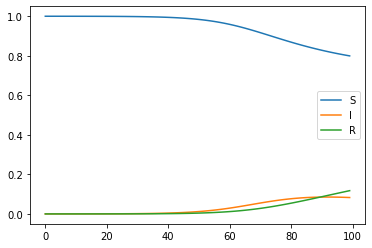

In [71]:
plt.plot(susceptible_pop_norm, label='S')
plt.plot(infected_pop_norm, label='I')
plt.plot(recovered_pop_norm, label='R')
plt.legend()